In [1]:
import sys
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Importing the required modules
from musicalrobot import irtemp
from musicalrobot import edge_detection as ed
from musicalrobot import pixel_analysis as pa

## PART A:
### The temperature profile of the samples and plate is determined by detecting the edges, filling and labeling them, and monitoring the temperature at their centroids.

#### Use the function 'edge_detection.input_file' to load the input file

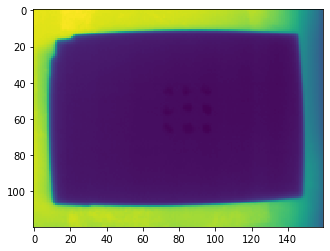

In [5]:
frames = ed.input_file('./musicalrobot/data/10_17_19_PPA_Shallow_plate.tiff')
plt.imshow(frames[0])

#### Crop the input file if required to remove the noise and increase the accuracy of edge detection

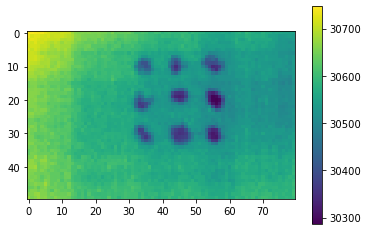

In [6]:
crop_frame = []
for frame in frames:
    crop_frame.append(frame[35:85,40:120])
plt.imshow(crop_frame[0])
plt.colorbar()

#### Use the wrapping function edge_detection.inflection_temp 

In [7]:
# Using the wrapping function
sorted_regprops, s_temp, p_temp, inf_temp, m_df = ed.inflection_temp(crop_frame, 3, 3)

/mnt/d/wsl/DIRECT/musical-robot-ver2/musicalrobot/edge_detection.py:293: RuntimeWarning: invalid value encountered in true_divide
  derivative = gradient[:,1]/gradient[:,0]


In [8]:
# Dataframe containing sample region properties
sorted_regprops[0]

,Row,Column,Plate_temp(cK),Radius,Plate_coord,Area,Perim,Sample_temp(cK)
unique_index,,,,,,,,
66.0,9.0,34.0,30562.0,2.820948,39.820948,25.0,15.656854,30406.0
51.0,21.0,33.0,30528.0,2.705758,38.705758,23.0,14.828427,30366.0
12.0,30.0,34.0,30544.0,2.931615,39.931615,27.0,17.071068,30376.0
74.0,9.0,43.0,30528.0,2.705758,48.705758,23.0,15.071068,30430.0
56.0,18.0,45.0,30534.0,2.705758,50.705758,23.0,14.828427,30350.0
38.0,30.0,45.0,30497.0,3.241022,51.241022,33.0,18.242641,30359.2
47.0,9.0,55.0,30526.0,3.141275,61.141275,31.0,18.485281,30394.4
68.0,19.0,55.0,30526.0,2.985411,60.985411,28.0,17.656854,30291.0
53.0,30.0,55.0,30524.0,2.646284,60.646284,22.0,14.242641,30317.0


In [9]:
# Dataframe containing sample coordinates and corresponding melting points
m_df

,Row,Column,Melting point
unique_index,,,
66.0,9.0,34.0,45.950
51.0,21.0,33.0,36.390
12.0,30.0,34.0,44.590
74.0,9.0,43.0,45.500
56.0,18.0,45.0,42.730
38.0,30.0,45.0,44.972
47.0,9.0,55.0,39.546
68.0,19.0,55.0,39.510
53.0,30.0,55.0,40.900


#### Plotting the locations at which the temperature was recorded

Text(0.5, 1.0, 'Sample centroid and plate locations at which the temperature profile is monitored')

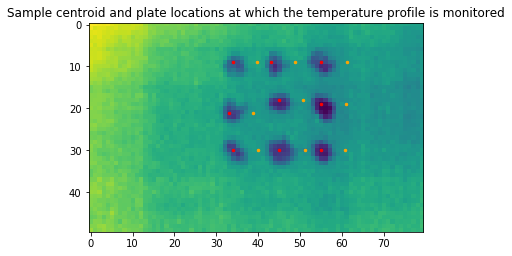

In [10]:
# Plotting the original image with the samples
# and centroid and plate location
plt.imshow(crop_frame[0])
plt.scatter(sorted_regprops[0]['Plate_coord'],sorted_regprops[0]['Row'],c='orange',s=6)
plt.scatter(sorted_regprops[0]['Column'],sorted_regprops[0]['Row'],s=6,c='red')
plt.title('Sample centroid and plate locations at which the temperature profile is monitored')

Text(0.5, 1.0, 'Sample centroid and plate locations at which the temperature profile is monitored')

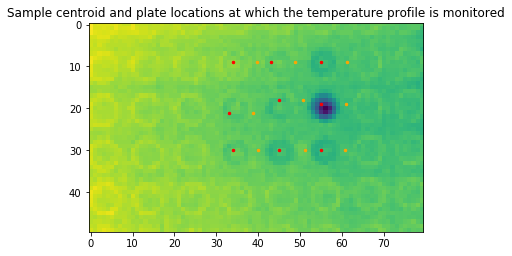

In [32]:
# Plotting the original image with the samples
# and centroid and plate location
plt.imshow(crop_frame[800])
plt.scatter(sorted_regprops[800]['Plate_coord'],sorted_regprops[800]['Row'],c='orange',s=6)
plt.scatter(sorted_regprops[800]['Column'],sorted_regprops[800]['Row'],s=6,c='red')
plt.title('Sample centroid and plate locations at which the temperature profile is monitored')

In [34]:
print(sorted_regprops[0]['Column'])
print(sorted_regprops[800]['Column'])

unique_index
66.0    34.0
51.0    33.0
12.0    34.0
74.0    43.0
56.0    45.0
38.0    45.0
47.0    55.0
68.0    55.0
53.0    55.0
Name: Column, dtype: float64
unique_index
66.0    34.0
51.0    33.0
12.0    34.0
74.0    43.0
56.0    45.0
38.0    45.0
47.0    55.0
68.0    55.0
53.0    55.0
Name: Column, dtype: float64


Text(0.5, 1.0, 'Temperature of the sample against the temperature of the plate')

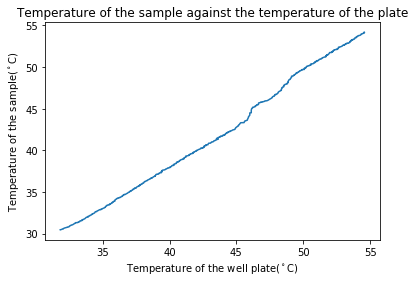

In [15]:
# Plotting the temperature profile of a sample against the temperature profile
# of the plate at a location next to the sample.
plt.plot(p_temp[5],s_temp[5])
plt.ylabel('Temperature of the sample($^\circ$C)')
plt.xlabel('Temperature of the well plate($^\circ$C)')
plt.title('Temperature of the sample against the temperature of the plate')

## Part B:
* The temperature profile of the samples and the plate is obtained by summing the pixel values over individual rows and columns, finding the troughs in the array of all the column and row sums.
* The temperature profile is then obtained by monitoring the temperature value at the intersection of peak values in the column and row sums. 

#### Load the input file as frames

#### Use the function irtemp.pixel_temp to get the temperature of the samples and at plate locations next to the samples in every frame of the input video.

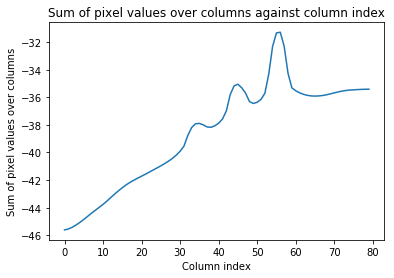

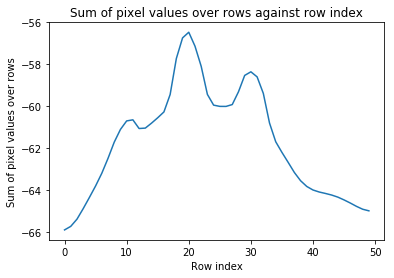

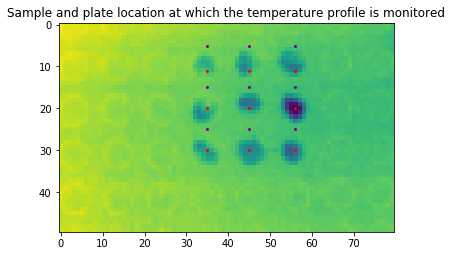

/Users/shrilakshmisbonageri/miniconda3/envs/image/lib/python3.6/site-packages/musicalrobot/edge_detection.py:293: RuntimeWarning: invalid value encountered in true_divide
  derivative = gradient[:,1]/gradient[:,0]


In [10]:
m_df1 = pa.pixel_temp(crop_frame,len(crop_frame),n_columns = 3, n_rows = 3)

In [11]:
# Dataframe containing sample coordinates and corresponding melting points
m_df1

,Row,Column,Melting point
0,11,35,45.20
1,20,35,45.93
2,30,35,45.34
3,11,45,44.04
4,20,45,41.04
5,30,45,43.90
6,11,56,40.92
7,20,56,39.27
8,30,56,40.99
